In [1]:
import os
import sys
import numpy as np
import yaml
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

In [2]:
with open('datasets/final_malaria_5_classess/data.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)

# In ra dữ liệu
print(yaml_data['names'])

{0: 'rbc_parasitized_F_T', 1: 'rbc_parasitized_F_S', 2: 'rbc_parasitized_F_G', 3: 'rbc_unparasitized', 4: 'rbc_difficult'}


thống kê theo instance

In [3]:
class_name = list(yaml_data['names'].values())
print(class_name)
train_dict = {label: 0 for label in class_name}
val_dict = {label: 0 for label in class_name}
test_dict = {label: 0 for label in class_name}
test_dict

['rbc_parasitized_F_T', 'rbc_parasitized_F_S', 'rbc_parasitized_F_G', 'rbc_unparasitized', 'rbc_difficult']


{'rbc_parasitized_F_T': 0,
 'rbc_parasitized_F_S': 0,
 'rbc_parasitized_F_G': 0,
 'rbc_unparasitized': 0,
 'rbc_difficult': 0}

In [4]:
def count_instance(path, set_dict):
    for filename in os.listdir(path):
        cnt_ids = [0] * len(class_name)
        file_path = os.path.join(path, filename)

        with open(file_path, 'r') as file:
            for line in file:
                # Tách dòng thành các phần
                parts = line.strip().split()
                if parts:  
                    first_number = parts[0] 
                    cls_id = int(first_number)
                    cnt_ids[cls_id] += 1 

        for i in range(len(cnt_ids)):
            cls_name = class_name[i]
            set_dict[cls_name] += cnt_ids[i]

In [5]:
count_instance('datasets/final_malaria_5_classess/train/labels', train_dict)
count_instance('datasets/final_malaria_5_classess/val/labels', val_dict)
count_instance('datasets/final_malaria_5_classess/test/labels', test_dict)

In [6]:
print(train_dict)
print(val_dict)
print(test_dict)

{'rbc_parasitized_F_T': 599, 'rbc_parasitized_F_S': 213, 'rbc_parasitized_F_G': 112, 'rbc_unparasitized': 29834, 'rbc_difficult': 48}
{'rbc_parasitized_F_T': 91, 'rbc_parasitized_F_S': 27, 'rbc_parasitized_F_G': 16, 'rbc_unparasitized': 4279, 'rbc_difficult': 12}
{'rbc_parasitized_F_T': 177, 'rbc_parasitized_F_S': 59, 'rbc_parasitized_F_G': 45, 'rbc_unparasitized': 8746, 'rbc_difficult': 15}


In [7]:
df_train = pd.DataFrame(list(train_dict.items()), columns=['Class', 'Train instance Count'])
df_val = pd.DataFrame(list(val_dict.items()), columns=['Class', 'Validation instance Count'])
df_test = pd.DataFrame(list(test_dict.items()), columns=['Class', 'Test instance Count'])

df_combined = df_train.merge(df_val, on='Class').merge(df_test, on='Class')

file_path = 'img_instance_statistics.csv'  # Đường dẫn đến file Excel bạn muốn lưu
df_combined.to_csv(file_path, index=False)

print(f"Dữ liệu đã được lưu vào file {file_path}.")

Dữ liệu đã được lưu vào file img_instance_statistics.csv.


kích thước mean và std của từng ảnh

In [8]:
def img_sizes(folder_path):
    image_sizes = []

    # Duyệt qua tất cả các file ảnh trong thư mục
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Đọc ảnh
        image = cv2.imread(file_path)
        
        if image is not None:
            height, width = image.shape[:2]
            image_sizes.append((height, width))

    # Chuyển danh sách kích thước sang NumPy array để tính toán
    image_sizes = np.array(image_sizes)

    # Tính kích thước trung bình và độ lệch chuẩn theo từng chiều (height, width)
    mean_size = np.mean(image_sizes, axis=0)
    std_size = np.std(image_sizes, axis=0)
    return mean_size, std_size


In [9]:
mean_size, std_size = img_sizes('final_malaria_full_class/train/images')
print(mean_size)
print(std_size)

[2048. 3072.]
[0. 0.]


Width, Heigh statistics

In [11]:
wh_train = {label: [[], [], 0, 0, 0, 0, 0, 0, 0, 0] for label in class_name} 
# [w] [h] mean_w, mean_h, std_w, std_h, min_w, min_h, max_w, max_h
wh_val = {label: [[], [], 0, 0, 0, 0, 0, 0, 0, 0] for label in class_name}
wh_test = {label: [[], [], 0, 0, 0, 0, 0, 0, 0, 0] for label in class_name}
wh_train

{'rbc_parasitized_F_TA': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'rbc_parasitized_F_TJ': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'rbc_parasitized_F_S1': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'rbc_parasitized_F_S2': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'rbc_parasitized_F_G1': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'rbc_parasitized_F_G2-5': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'rbc_unparasitized': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'rbc_unparasitized_dead_kernel': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'rbc_unparasitized_artefact': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'rbc_difficult': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'OOC_F_Merozoit': [[], [], 0, 0, 0, 0, 0, 0, 0, 0],
 'OOC_artefact_and_other_cell': [[], [], 0, 0, 0, 0, 0, 0, 0, 0]}

In [12]:
def size_statistics(folder_path, wh_dict):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r') as file:
            for line in file:
                parts = line.strip().split()
                if parts:  
                    cls_id = int(parts[0])
                    w, h = float(parts[3]), float(parts[4])
                    
                    cls_name = class_name[cls_id]
                    wh_dict[cls_name][0].append(w)
                    wh_dict[cls_name][1].append(h)
    
    for key, value in wh_dict.items():
        w_array = np.array(value[0])
        h_array = np.array(value[1])
        if w_array.any():
            w_mean = np.mean(w_array)
            w_std = np.std(w_array)

            h_mean = np.mean(h_array)
            h_std = np.std(h_array)

            w_min = np.min(w_array)
            h_min = np.min(h_array)

            w_max = np.max(w_array)
            h_max = np.max(h_array)

        else:
            w_mean, w_std, h_mean, h_std, w_min, h_min, w_max, h_max = 0, 0, 0, 0, 0, 0, 0, 0

        wh_dict[key][2] , wh_dict[key][3] = w_mean, w_std
        wh_dict[key][4] , wh_dict[key][5] = h_mean, h_std

        wh_dict[key][6] , wh_dict[key][7] = w_min, h_min
        wh_dict[key][8] , wh_dict[key][9] = w_max, h_max




In [13]:
size_statistics('final_malaria_full_class/train/labels', wh_train)
size_statistics('final_malaria_full_class/val/labels', wh_val)
size_statistics('final_malaria_full_class/test/labels', wh_test)

In [16]:
wh_train['OOC_artefact_and_other_cell'][2:]

[0.019830684684684685,
 0.015001844298920207,
 0.027391675675675676,
 0.01658464817676474,
 0.005677,
 0.007529,
 0.126709,
 0.125195]

In [17]:
df_train = pd.DataFrame.from_dict(
    {label: values[2:] for label, values in wh_train.items()},
    orient='index',
    columns=['mean_w', 'std_w', 'mean_h', 'std_h', 'min_w', 'min_h', 'max_w', 'max_h']
)

df_val = pd.DataFrame.from_dict(
    {label: values[2:] for label, values in wh_val.items()},
    orient='index',
    columns=['mean_w', 'std_w', 'mean_h', 'std_h', 'min_w', 'min_h', 'max_w', 'max_h']
)

df_test = pd.DataFrame.from_dict(
    {label: values[2:] for label, values in wh_test.items()},
    orient='index',
    columns=['mean_w', 'std_w', 'mean_h', 'std_h', 'min_w', 'min_h', 'max_w', 'max_h']
)

df_train.to_csv('train_boxes.csv', index=True)
df_val.to_csv('val_boxes.csv', index=True)
df_test.to_csv('test_boxes.csv', index=True)


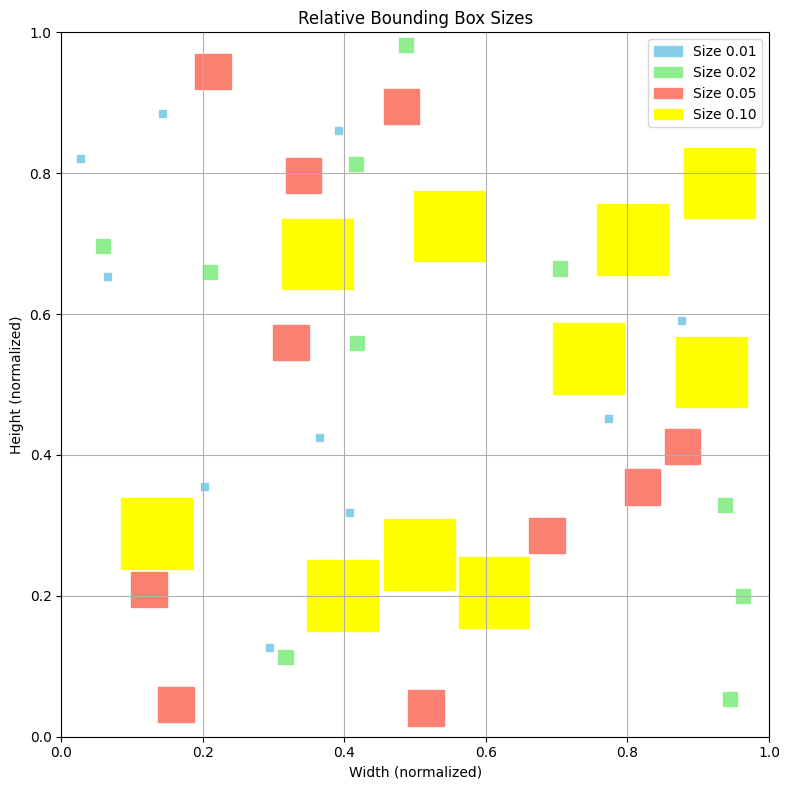

In [86]:
# Kích thước relative bounding box
sizes = [0.01, 0.02, 0.05, 0.1] * 10
# Danh sách màu sắc tương ứng với mỗi kích thước
colors = ['skyblue', 'lightgreen', 'salmon', '#ffff00'] * 10

# Tạo một đồ thị mới
fig, ax = plt.subplots(figsize=(8, 8))  # Tăng chiều cao của đồ thị

# Danh sách để lưu tọa độ hình chữ nhật đã vẽ
rectangles = []

# Vẽ hình chữ nhật cho từng kích thước
for size, color in zip(sizes, colors):
    # Tìm tọa độ ngẫu nhiên cho hình chữ nhật
    while True:
        x_start = random.uniform(0, 1 - size)  # Đảm bảo hình chữ nhật nằm trong phạm vi
        y_start = random.uniform(0, 1 - size)  # Đảm bảo hình chữ nhật nằm trong phạm vi
        
        # Kiểm tra xem hình chữ nhật có chồng chéo với bất kỳ hình nào đã vẽ trước đó không
        overlap = False
        for rect in rectangles:
            if (x_start < rect[0] + rect[2] and
                x_start + size > rect[0] and
                y_start < rect[1] + rect[3] and
                y_start + size > rect[1]):
                overlap = True
                break
        
        # Nếu không chồng chéo, thoát khỏi vòng lặp
        if not overlap:
            break

    # Vẽ hình chữ nhật với chiều rộng và chiều cao theo kích thước
    rect = patches.Rectangle((x_start, y_start), size, size, color=color, label=f'Size {size:.2f}')
    ax.add_patch(rect)
    
    # Lưu tọa độ của hình chữ nhật đã vẽ
    rectangles.append((x_start, y_start, size, size))

# Thiết lập giới hạn trục
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')
# Thêm tiêu đề và nhãn
plt.title('Relative Bounding Box Sizes')
plt.xlabel('Width (normalized)')
plt.ylabel('Height (normalized)')

# Thêm lưới
plt.grid()

# Hiện thị đồ thị
plt.tight_layout()  # Tự động điều chỉnh bố cục
plt.show()